<a href="https://colab.research.google.com/github/codeworks-data/tensorflow-workshop/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%201%20-%20Lesson%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **1. IMPORT DATA**

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-11-22 19:20:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2021-11-22 19:20:42 (49.2 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [ ]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

#### Display third row in the dataset

In [ ]:
datastore[2]

{'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
 'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
 'is_sarcastic': 1}

#### Store inputs and labels

In [ ]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [ ]:
labels[2]

1

### **2. DATA PREPARATION**

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [ ]:
training_sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

### **3. TOKENIZATION AND PADDIND**

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_sequences[0]

[328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863]

**Display the padded of first row. What's the length?**

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

### **4. NEURAL NETWORK MODEL DEFINITION**

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
      ])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

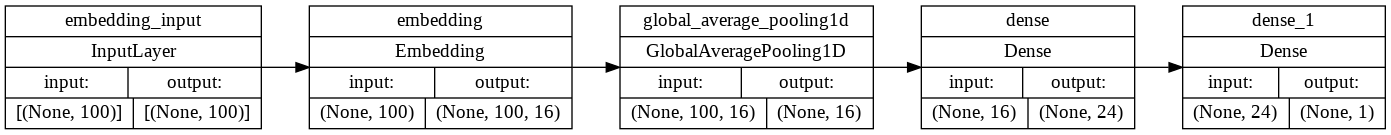

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='LR')

### **5. MODEL TRAINING**

In [ ]:
num_epochs = 10
model_history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.0125 - accuracy: 0.9963 - val_loss: 1.6809 - val_accuracy: 0.8053 - 2s/epoch - 3ms/step
Epoch 2/10
625/625 - 2s - loss: 0.0091 - accuracy: 0.9979 - val_loss: 1.6308 - val_accuracy: 0.8043 - 2s/epoch - 3ms/step
Epoch 3/10
625/625 - 2s - loss: 0.0091 - accuracy: 0.9977 - val_loss: 1.7526 - val_accuracy: 0.8052 - 2s/epoch - 3ms/step
Epoch 4/10
625/625 - 2s - loss: 0.0105 - accuracy: 0.9969 - val_loss: 1.7253 - val_accuracy: 0.8050 - 2s/epoch - 3ms/step
Epoch 5/10
625/625 - 2s - loss: 0.0102 - accuracy: 0.9968 - val_loss: 1.9802 - val_accuracy: 0.8032 - 2s/epoch - 3ms/step
Epoch 6/10
625/625 - 2s - loss: 0.0079 - accuracy: 0.9979 - val_loss: 1.8697 - val_accuracy: 0.8021 - 2s/epoch - 3ms/step
Epoch 7/10
625/625 - 2s - loss: 0.0091 - accuracy: 0.9976 - val_loss: 1.9104 - val_accuracy: 0.8046 - 2s/epoch - 3ms/step
Epoch 8/10
625/625 - 2s - loss: 0.0094 - accuracy: 0.9974 - val_loss: 2.0180 - val_accuracy: 0.8034 - 2s/epoch - 3ms/step
Epoch 9/10
625/625 - 2s 

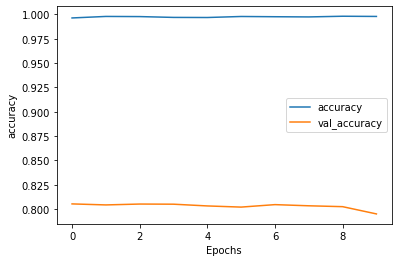

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(model_history, "accuracy")

### 6. PREDICTION

In [ ]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded))

[[9.9457943e-01]
 [1.5598174e-11]]
